# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

All costs between different nodes should be greater or equal to zero, and a path sorting process is needed in every searching iteration.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Intuitively, instead of stopping when DFS find a proper path, save it in a list and continue searching,   
and adopt suitable pruning strategy and a sort process at the end, it should be able to find the optimal solution.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

If there's enough RAM and it's needed to find the optimal(shortest) solution, BFS is the better choice.  
Whereas if the RAM is limited, DFS would be better.

##### 2.4 When can we use machine learning ?

When the problem contains too much data to be handled manually, and there's some potential patterns behind the data which could be somehow modeled, machine learning will be one of the suitable solution.

##### 2.5 What is the gradient of a function ?

The gradient is a vector which refers to the tangent slope of the function at a specific point,   
and the function can obtain the most acceleration when it moves along the gradient at that point.

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

Randomly initialize the parameters at first, and **use them to calculate the prediction**,  
then **get the loss between predictions and labels, derive the loss to get the gradients**,  
and **update the parameters to the negative direction of the gradients with a chosen step size**,  
**repeat these steps** and the maximum(maybe a local maximum if the function is not convex) value will be found.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [182]:
# 爬取和处理数据
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import time

# 格式化数据
import pandas as pd
import numpy as np
from collections import defaultdict

# 获取坐标信息
import urllib
import hashlib
import json

# 计算距离
import math

# 绘图
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
# 设置字体，解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [45]:
def get_web_data(url):
    '''
    从链接地址获取对应html页面数据
    '''
    # 获取返回信息
    response = requests.get(url)
    # 取出html
    html = response.text
    return html

In [46]:
def clean_web_data(html):
    '''
    将html字符串转为BeautifulSoup对象
    '''
    # lxml是解析html的parser
    return BeautifulSoup(html, 'lxml')

In [47]:
# 待爬取的页面地址，首末车时间|北京地铁官方网站
# https://www.bjsubway.com/station/xltcx/
url = "https://www.bjsubway.com/e/action/ListInfo/?classid=39&ph=1" 

In [48]:
html = get_web_data(url)

In [49]:
# 较为杂乱
html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<title>首末车时间 | 北京地铁官方网站</title>\r\n<meta name="keywords" content="北京地铁官方网站,首末车时间" />\r\n<meta name="description" content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" />\r\n<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\r\n<link href="/subway/css/common.css" rel="stylesheet" type="text/css" />\r\n<link href="/subway/css/search.css" rel="stylesheet" type="text/css" />\r\n<script type="text/javascript" src="/subway/js/jquery.js"></script>\r\n<script type="text/javascript" src="/subway/js/around.js"></script>\r\n<script type="text/javascript">\r\n/*线路名称多窗口切换效果*/\r\nfunction GetId(id){\r\n  return document.getElementById(id)        \r\n }\r\n  function doClick(o){\r\n  var j,id,e;\r\n  for(var i=0;i<=21;i++){     \r\n      id =i;\r

**转为BeautifulSoup**

In [50]:
clean_html = clean_web_data(html)

In [51]:
type(clean_html)

bs4.BeautifulSoup

In [52]:
# 可以看到清晰的页面内容，便于查找
clean_html

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>首末车时间 | 北京地铁官方网站</title>
<meta content="北京地铁官方网站,首末车时间" name="keywords"/>
<meta content="可以查询站点的首末车通车时间，避免错过对出行造成不便。" name="description"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/subway/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/subway/css/search.css" rel="stylesheet" type="text/css"/>
<script src="/subway/js/jquery.js" type="text/javascript"></script>
<script src="/subway/js/around.js" type="text/javascript"></script>
<script type="text/javascript">
/*线路名称多窗口切换效果*/
function GetId(id){
  return document.getElementById(id)        
 }
  function doClick(o){
  var j,id,e;
  for(var i=0;i<=21;i++){     
      id =i;
      j =GetId(id);
      e = GetId("sub"+i);
      if(id != o.id){  

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [53]:
def get_lines(clean_html):
    '''
    获取各线路名称和对应table编号组成的字典
    '''
    lines = {}
    # 找到所有包含 onclick 属性等于 doClick(this) 的 li元素，返回结果类型为 bs4.element.ResultSet
    result_set = clean_html.find_all("li", {"onclick" : "doClick(this)"})
    
    # 分成两段且不相连的线路需要特殊处理
    spec_lines = {"8号线":["北段","南段"],"14号线":["西段","东段"]}
    
    # 遍历查找结果，记录线路名称
    for line_info in result_set:
        line = line_info.getText()
        # 判断是否是分段线
        if line in spec_lines:
            for segment in spec_lines[line]:
                lines[len(lines)] = line + "(" + segment +")"
        else:
            lines[len(lines)] = line
    return lines

In [54]:
lines = get_lines(clean_html)

In [55]:
lines

{0: '1号线',
 1: '2号线',
 2: '4号线',
 3: '5号线',
 4: '6号线',
 5: '7号线',
 6: '8号线(北段)',
 7: '8号线(南段)',
 8: '9号线',
 9: '10号线',
 10: '13号线',
 11: '14号线(西段)',
 12: '14号线(东段)',
 13: '15号线',
 14: '16号线',
 15: '八通线',
 16: '昌平线',
 17: '亦庄线',
 18: '大兴线',
 19: '房山线',
 20: 'S1线',
 21: '燕房线'}

In [56]:
def get_structured_data(clean_html, lines):
    '''
    获取结构化数据，保存一份全表数据，以备后用
    '''
    structured_data = []
    # 获取所有时刻表
    tables = clean_html.find_all("tbody")
    
    assert(len(tables) == len(lines))
    
    for i,table in enumerate(tables):
        line = lines[i]
        # 获取所有行元素
        rows = table.find_all("tr")
        for row in rows:
            row_info = []
            # 记录线路编号
            row_info.append(i)
            # 获取站名
            station = row.findChild("th").getText().strip()
            row_info.append(station)
            # 获取所有单元格
            cells = row.find_all("td")
            for cell in cells:
                time = cell.getText().strip()
                row_info.append(time)
            structured_data.append(row_info)
    return structured_data

In [57]:
data = get_structured_data(clean_html, lines)

In [58]:
data

[[0, '苹果园', '5:10', '23:30', '0:31', '――', '――', '――'],
 [0, '古城', '4:58', '23:33', '0:34', '5:36', '0:23', '1:26'],
 [0, '八角游乐园', '5:01', '23:36', '0:37', '5:32', '0:20', '1:23'],
 [0, '八宝山', '5:04', '23:39', '0:40', '5:29', '0:17', '1:20'],
 [0, '玉泉路', '5:06', '23:42', '0:43', '5:26', '0:14', '1:17'],
 [0, '五棵松', '5:09', '23:45', '0:46', '5:23', '0:11', '1:15'],
 [0, '万寿路', '5:12', '23:48', '0:49', '5:21', '0:08', '1:12'],
 [0, '公主坟', '5:14', '23:50', '0:51', '5:18', '0:06', '1:09'],
 [0, '军事博物馆', '5:17', '23:53', '0:54', '5:16', '0:04', '1:07'],
 [0, '木樨地', '5:19', '23:55', '0:56', '5:13', '0:01', '1:05'],
 [0, '南礼士路', '5:21', '23:57', '0:58', '5:11', '23:59', '1:02'],
 [0, '复兴门', '5:15', '0:00', '1:01', '5:10', '23:57', '1:01'],
 [0, '西单', '5:17', '0:02', '1:03', '5:17', '23:54', '0:58'],
 [0, '天安门西', '5:19', '0:04', '1:05', '5:15', '23:52', '0:55'],
 [0, '天安门东', '5:21', '0:06', '1:07', '5:13', '23:50', '0:53'],
 [0, '王府井', '5:23', '0:08', '1:09', '5:11', '23:48', '0:51'],
 [0, '东单

In [59]:
# 转为DataFrame
data_x = pd.DataFrame(data)

In [60]:
# 查看前5条数据
data_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,苹果园,5:10,23:30,0:31,――,――,――,None,None,None,None
1,0,古城,4:58,23:33,0:34,5:36,0:23,1:26,None,None,None,None
2,0,八角游乐园,5:01,23:36,0:37,5:32,0:20,1:23,None,None,None,None
3,0,八宝山,5:04,23:39,0:40,5:29,0:17,1:20,None,None,None,None
4,0,玉泉路,5:06,23:42,0:43,5:26,0:14,1:17,None,None,None,None


In [61]:
# 查看后5条数据
data_x.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
425,21,大石河东,5:15,22:40,5:40,23:05,None,None,None,None,None,None
426,21,马各庄,5:18,22:43,5:37,23:02,None,None,None,None,None,None
427,21,饶乐府,5:20,22:45,5:35,23:00,None,None,None,None,None,None
428,21,房山城关,5:23,22:48,5:32,22:57,None,None,None,None,None,None
429,21,燕山,----,----,5:30,22:55,None,None,None,None,None,None


In [62]:
# 查看基本信息
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 12 columns):
0     430 non-null int64
1     430 non-null object
2     430 non-null object
3     430 non-null object
4     430 non-null object
5     430 non-null object
6     275 non-null object
7     180 non-null object
8     140 non-null object
9     47 non-null object
10    18 non-null object
11    18 non-null object
dtypes: int64(1), object(11)
memory usage: 40.4+ KB


保存爬取的数据，方便之后使用

In [63]:
# 保存线路信息
lines_json = json.dumps(lines)
with open('lines.txt', 'w') as f:
    f.write(lines_json)

In [64]:
# 保存站点时刻表信息
data_x.to_csv('underground_timetables.csv', index=False)

本来准备使用各站间首班车时间间隔（首班车开到各个站点的时间差）做为图连边的cost，但是获取的数据过于杂乱，每条线路的格式都有出入，且部分环线有多个起始站点（带有车库的站点，如2号线的积水潭站），改为使用站间距离。  
  
找到了官网的站间公里数页面（https://www.bjsubway.com/station/zjgls/ ），但是感觉像是已经弃用了，页面格式混乱，站点信息也比较老旧。  

最后决定使用百度地图平台的api获取站点坐标，使用geo_distance方法来计算直线距离。

In [70]:
def get_coordinate(address, ak, sk, city = '北京'):
    '''
    使用百度地图开放平台 - 地理编码api 获取站点对应坐标
    平台地址：http://lbsyun.baidu.com/apiconsole/center#/home
    地址编码服务：http://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-geocoding
    默认请求数限制6000次/天，最高并发峰值 50 次/秒
    
    注册->创建应用->应用配置->获取ak和sk->调用接口
    
    Parameters
    ----------
    address: 地址，即站点名称
    ak: application key，申请平台应用后获得
    sk: security key，申请平台应用后获得
    city: 城市名，避免多个城市中重名地点的问题
    
    Returns
    -------
    coordinate : tuple of float
        (lat, long)
    '''
    # 返回坐标，默认(0,0)
    coordinate = (0,0)
    
    # 以get请求为例http://api.map.baidu.com/geocoding/v3/?address=百度大厦&output=json&ak=yourak
    queryStr = '/geocoding/v3/?address='+ address + '&output=json&ak=' + ak# + '&city=' + city
    
    # 对queryStr进行转码，safe内的保留字符不转换
    encodedStr = urllib.request.quote(queryStr, safe="/:=&?#+!$,;'@()*[]")
    
    # 在最后直接追加上sk
    rawStr = encodedStr + sk
    
    # md5计算出的sn值7de5a22212ffaa9e326444c75a58f9a0
    generated_sn = hashlib.md5(urllib.parse.quote_plus(rawStr).encode("utf8")).hexdigest()
    # 最终合法请求url是http://api.map.baidu.com/geocoding/v3/?address=百度大厦&output=json&ak=yourak&sn=generated_sn
    url = 'http://api.map.baidu.com' + queryStr + '&sn=' + generated_sn
    # print(url)
    
    # 调用api，获取返回数据
    data = get_web_data(url)
    # 将字符串转为json
    data = json.loads(data)
    # print(data)
    
    # 如果调用成功，取出坐标数据
    # data 格式如下
    # {'status': 0, 'result': {'location': {'lng': 116.30789936413898, 'lat': 40.05703792688976}, 'precise': 1, 'confidence': 75, 'comprehension': 100, 'level': '商务大厦'}}
    if data and data['status'] == 0:
        location = data['result']['location']
        coordinate = (location['lng'], location['lat'])
    
    return coordinate

In [361]:
address = "北京石景山区苹果园地铁站"
ak = 'yourak' # application key
sk = 'yoursk' # security key
get_coordinate(address, ak, sk)

(116.19055299672614, 39.93664708317953)

In [67]:
# debug
import pdb

In [78]:
def get_coordinates(timetables, lines):
    '''
    通过百度地图平台api获取各站点坐标
    '''
    pdb.set_trace() # debug
    coordinates = {}
    for line in lines:
        # 大兴线与4号线信息重复，跳过
        if lines[line] == '大兴线':
            continue
        # 取出对应站点信息
        timetable = timetables.loc[timetables['0'] == int(line)]
        stations = timetable['1']
        # 遍历站点，调用接口获取坐标并保存
        for station in stations:
            if station not in coordinates:
                coordinate = get_coordinate("北京" + station + "地铁站", ak, sk)
                coordinates[station] = coordinate
    return coordinates

In [79]:
# 重新读取lines的方法
def reload_lines(file_name='lines.txt'):
    lines = None
    with open(file_name) as f:
        lines = f.read()
        lines = json.loads(lines)
    return lines

In [80]:
# 重新读取timetables的方法
def reload_timetables(file_name='underground_timetables.csv'):
    return pd.read_csv(file_name)

In [81]:
# 保存json文件的方法
def save_data_to_file(file_name, data):
    data_json = json.dumps(data)
    with open('underground_coordinates.txt', 'w') as f:
        f.write(data_json)

In [82]:
lines = reload_lines()

In [83]:
timetables = reload_timetables()

In [84]:
coordinates = get_coordinates(timetables, lines)

> <ipython-input-78-f996b283458e>(3)get_coordinates()
-> coordinates = {}
(Pdb) c


In [94]:
coordinates

{'西直门': (116.49191536141639, 39.92671605612581),
 '积水潭': (116.37757723949537, 39.95426294352174),
 '鼓楼大街': (116.85252393889786, 40.38520792321877),
 '安定门': (116.41398735842581, 39.960745517627934),
 '雍和宫': (116.42363246468643, 39.953637951098024),
 '东直门': (116.43925354835218, 39.94617990928074),
 '东四十条': (116.43256721071249, 39.939804360390596),
 '朝阳门': (116.44275469407732, 39.92874765118868),
 '北京站': (116.43384170680733, 39.910039519869805),
 '崇文门': (116.4327081350843, 39.90649839549037),
 '前门': (116.40458802855271, 39.9055240609918),
 '和平门': (116.39079598473579, 39.90661206578565),
 '宣武门': (116.37524344178046, 39.90115194090726),
 '长椿街': (116.37007289497694, 39.90282440290133),
 '阜成门': (116.35985816331106, 39.929940685261414),
 '车公庄': (116.34081049327749, 39.93908450897057)}

**使用百度地图平台api获取的部分坐标不正确，尝试通过百度地图拾取坐标系统获取**

这里使用了selenium库来控制浏览器，从页面依次获取各地铁站点坐标

In [105]:
def open_browser(browser):
    '''
    跳转到对应页面
    '''
    browser.get('http://api.map.baidu.com/lbsapi/getpoint/index.html')
    time.sleep(2)
    print("页面已打开")

In [115]:
def search_by_name(browser, name):
    '''
    输入查询内容，点击查询（百度一下）按键
    '''
    # 找到 id 为 localvalue 的搜索框 html 元素
    search_box = browser.find_element_by_id("localvalue")
    # 使用 control + a，退格 来清空上一次的查找内容
    search_box.send_keys(Keys.CONTROL,'a')
    search_box.send_keys(Keys.BACK_SPACE)
    # 输入查找内容
    search_box.send_keys(name)
    # 点击查询按键
    browser.find_element_by_id("localsearch").click()

In [255]:
def get_first_location(browser):
    '''
    获取第一个查询结果对应坐标
    '''
    # 添加了循环和 try 语句，避免页面还没有刷新出来就去读取导致报错的问题；
    # 也处理了部分站点内容获取失败，返回坐标与前一站点相同的问题
    while True:
        try:
            # 找到第一条结果
            target = browser.find_element_by_id("no_0")
            # 如果可以获取到对应元素
            if target and target.find_element_by_tag_name("p"):
                p = target.find_element_by_tag_name("p")
                # 获取 html 元素中的文字
                text = p.text
                # 使用正则取出坐标信息
                coordinate = re.findall("坐标：(\d+.\d+),(\d+.\d+)", text)[0]
                # 转为数字元组
                coordinate = tuple(map(float, coordinate))
                return coordinate
        except:
            # 如果没有找到对应元素，会获取异常，并继续循环
            print("找不到对应元素 no_0 p")

In [256]:
def get_coordinate_2(browser, name):
    '''
    获取名称为name的地点坐标
    '''
    # 添加了sleep避免浏览器刷新过快，在获取方法里加入循环后可以适当降低等待时间
    time.sleep(0.5)
    # 查询站点
    search_by_name(browser, name)
    time.sleep(1)
    # 获取坐标
    coordinate = get_first_location(browser)
    return coordinate

In [257]:
def get_coordinates_2(timetables, lines):
    '''
    获取坐标主方法，根据输入的时刻表和线路信息分线路查找各站点对应坐标
    '''
    coordinates = {}
    # 放chromedriver.exe 文件的绝对路径
    chromePath = "E:\chrome\chromedriver.exe"

    # 浏览器信息
    browser = webdriver.Chrome(executable_path=os.path.abspath(chromePath))
    # browser.maximize_window()
    
    # 打开对应页面
    open_browser(browser)
    time.sleep(1)
    for line in lines:
        # 大兴线与4号线信息重复，跳过
        if lines[line] == '大兴线':
            continue
        # 取出线路对应的站点
        timetable = timetables.loc[timetables['0'] == int(line)]
        stations = timetable['1']
        # 遍历站点
        for station in stations:
            # 加入存在判断，避免对换乘站重复执行
            if station not in coordinates:
                # 获取坐标，加入字典
                coordinate = get_coordinate_2(browser, "北京" + station + "地铁站")
                print(station, coordinate) # debug
                coordinates[station] = coordinate
    return coordinates

In [258]:
coordinates = get_coordinates_2(timetables, lines)

页面已打开
苹果园 (116.184436, 39.932436)
古城 (116.197076, 39.913414)
八角游乐园 (116.219395, 39.913076)
八宝山 (116.2424, 39.913187)
玉泉路 (116.259475, 39.913501)
五棵松 (116.280661, 39.913834)
万寿路 (116.301384, 39.913711)
公主坟 (116.316746, 39.913701)
军事博物馆 (116.329311, 39.913343)
木樨地 (116.3441, 39.913125)
南礼士路 (116.359177, 39.912979)
复兴门 (116.36376, 39.913025)
西单 (116.381905, 39.913327)
天安门西 (116.398036, 39.913776)
天安门东 (116.407913, 39.914082)
王府井 (116.418017, 39.914402)
东单 (116.425374, 39.914503)
建国门 (116.44195, 39.914505)
永安里 (116.457086, 39.914223)
国贸 (116.467328, 39.914437)
大望路 (116.483555, 39.914614)
四惠 (116.502033, 39.914861)
四惠东 (116.521965, 39.914941)
西直门 (116.361446, 39.946471)
积水潭 (116.379185, 39.954765)
鼓楼大街 (116.400238, 39.954611)
安定门 (116.414597, 39.955441)
雍和宫 (116.42312, 39.955113)
东直门 (116.441365, 39.947769)
东四十条 (116.440638, 39.939841)
朝阳门 (116.44019, 39.93046)
北京站 (116.433608, 39.911127)
崇文门 (116.424427, 39.9072)
前门 (116.404276, 39.906534)
和平门 (116.390619, 39.906362)
宣武门 (116.380848, 39.90

生命科学园 (116.30055, 40.100975)
肖村 (116.455024, 39.839926)
小红门 (116.465808, 39.83399)
旧宫 (116.467432, 39.812543)
亦庄桥 (116.486851, 39.808826)
亦庄文化园 (116.49701, 39.812839)
万源街 (116.511997, 39.80917)
荣京东街 (116.519823, 39.799521)
荣昌东街 (116.528038, 39.789194)
同济南路 (116.546383, 39.779147)
经海路 (116.568912, 39.789493)
次渠南 (116.587934, 39.800804)
次渠 (116.597911, 39.809191)
亦庄火车站 (116.608168, 39.818345)
大葆台 (116.298159, 39.814112)
稻田 (116.225429, 39.800509)
长阳 (116.219263, 39.769411)
篱笆房 (116.195928, 39.766697)
广阳城 (116.191395, 39.754016)
良乡大学城北 (116.189861, 39.736109)
良乡大学城 (116.182872, 39.729499)
良乡大学城西 (116.162684, 39.7296)
良乡南关 (116.147255, 39.72947)
苏庄 (116.131898, 39.729197)
阎村东 (116.107001, 39.734677)
四道桥 (116.140356, 39.922119)
桥户营 (116.132271, 39.918355)
上岸 (116.128714, 39.911139)
栗园庄 (116.129827, 39.901771)
小园 (116.121001, 39.896156)
石厂 (116.106975, 39.895137)
紫草坞 (116.093276, 39.730266)
阎村 (116.086807, 39.722483)
星城 (116.067772, 39.719734)
大石河东 (116.046084, 39.716115)
马各庄 (116.023054, 39

In [259]:
# 保存坐标信息
save_data_to_file('underground_coordinates.txt', coordinates)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [260]:
def reload_data_from_file(file_name):
    '''
    从文件中读取json对象的方法
    '''
    data = None
    with open(file_name) as f:
        data = f.read()
        data = json.loads(data)
    return data

In [261]:
# 从文件获取坐标信息
coordinates = reload_data_from_file('underground_coordinates.txt');

绘制站点图

In [262]:
station_graph = nx.Graph()
station_graph.add_nodes_from(list(coordinates.keys()))

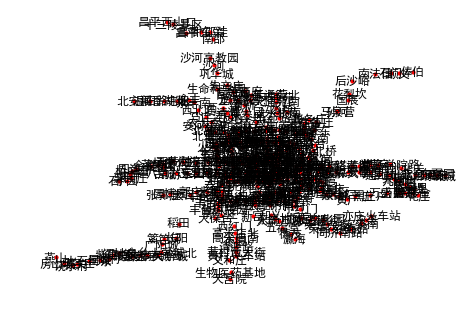

In [263]:
# 画出站点图，可以看出这次获取的坐标基本上是符合真实地铁站点分布的
nx.draw(station_graph, coordinates, with_labels=True, node_size=10)

In [264]:
class Search_Agent_1:
    '''
    基础搜索类，直接根据线路连接关系建立图，并使用BFS进行搜索，
    **可以加入参数控制区分使用BFS还是DFS**
    '''
    def __init__(self, name):
        self.name = name
        
    def build_graph(self, lines, timebales):
        '''
        建立图，记录站点连接关系
        '''
        # 建立字典
        self.graph = defaultdict(list)
        # 环线连接需要特殊处理
        loop_lines = {"2号线","10号线"}
        # 遍历线路
        for line in lines:
            # 大兴线与4号线信息重复，跳过
            if lines[line] == '大兴线':
                continue
            # 按线路取出站名，建立连接
            timetable = timetables.loc[timetables['0'] == int(line)]
            line = lines[line]
            stations = list(timetable['1'])
            for i in range(len(stations) - 1):
                s1 = stations[i]
                s2 = stations[i + 1]
                self.graph[s1].append(s2)
                self.graph[s2].append(s1)
            # 处理环线的首末连接关系
            if line in loop_lines:
                s1 = stations[0]
                s2 = stations[-1]
                self.graph[s1].append(s2)
                self.graph[s2].append(s1)
                
        return "Graph generated"
    
    def search(self, start, destination):
        '''
        在图中查找路径
        '''
        if not self.graph:
            return "还未建立Graph！"
        if start not in self.graph:
            return "起始站点不在图中！"
        if destination not in self.graph:
            return "终点不在图中！"
        pathes = [[start]] # list 存储待搜索路径（相当于bfs中的队列queue）
        visited = set() # set 记录已搜索的节点

        while pathes:
            path = pathes.pop(0) # 取出第一条路径，相当于队首元素
            frontier = path[-1]  # 取出即将探索的节点

            # 如果该点已经探索过，则不用再探索，跳过
            if frontier in visited:
                continue
            # 取出该点的后继，即有连接关系的点
            successors = self.graph[frontier]
            
            # 遍历后继节点
            for station in successors:
                # 跳过已经在路径中的点，避免成环
                if station in path:
                    continue 
                # 这里不能直接用append，append会拼入原列表，并返回None；
                # 使用加号为列表拼接，会返回新列表
                new_path = path + [station]
                # 加入队列list尾部
                pathes.append(new_path) 
                # 如果已经找到终点，直接返回该路径
                if station == destination:
                    return "->".join(new_path)

            # 将节点加入已访问记录
            visited.add(frontier)

        # 遍历结束，没有找到路径，返回空列表
        return "搜索失败"

In [265]:
sa1 = Search_Agent_1("北京地铁")

In [266]:
sa1.build_graph(lines, timetables)

'Graph generated'

In [267]:
# 打印连接关系
sa1.graph

defaultdict(list,
            {'苹果园': ['古城', '金安桥', '杨庄'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠', '九龙山', '金台路'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '

**简单测试**

In [268]:
sa1.search("奥体中心","天安门西")

'奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西'

In [269]:
sa1.search("北沙滩","西二旗")

'北沙滩->奥林匹克公园->森林公园南门->林萃桥->永泰庄->西小口->育新->霍营->回龙观->龙泽->西二旗'

In [270]:
sa1.search("五棵松","北京西")

'终点不在图中！'

In [271]:
sa1.search("五棵松","北京站")

'五棵松->万寿路->公主坟->军事博物馆->木樨地->南礼士路->复兴门->西单->宣武门->和平门->前门->崇文门->北京站'

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [173]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [174]:
def get_distance(coordinats, s1, s2):
    return geo_distance(coordinats[s1],coordinats[s2])

In [200]:
class Node:
    '''
    图节点，包含两个属性，站点名称，和连边组成的字典
    '''
    def __init__(self, station):
        self.station = station
        self.edges = {} # key: 连接站点， 值：连边列表
    
    def add_edge(self, to, distance, line):
        self.edges[to] = Edge(to, distance, line)
        
    def has_edge(self, to):
        return to in self.edges

In [195]:
class Edge:
    '''
    图连边，包含三个属性，所连站点，站间距离，和所属线路
    '''
    def __init__(self, to, distance, line):
        self.to = to # 所连站点
        self.distance = distance # 距离
        self.line = line # 所属线路

In [353]:
class Search_Agent_2():
    '''
    使用节点和连边组成图的查找类，可以使用transfer_weight和sort_key控制查找结果的排序方式
    '''
    def __init__(self, name, transfer_cost):
        # transfer_cost 是换乘时的损失，可以根据需要进行调整，可以参考站间距离的取值范围（0-8）进行设置
        self.name = name
        self.transfer_cost = transfer_cost
    
    def build_graph(self, coordinates, lines, timetables):
        '''
        建立图
        '''
        self.graph = {} # key: 站点名称，值：站点Node对象
        
        # 环线连接需要特殊处理
        loop_lines = {"2号线","10号线"}
        # 遍历线路
        for line in lines:
            # 大兴线与4号线信息重复，跳过
            if lines[line] == '大兴线':
                continue
            # 按线路取出站名，建立连接
            timetable = timetables.loc[timetables['0'] == int(line)]
            line = lines[line]
            stations = list(timetable['1'])
            for i in range(len(stations) - 1):
                s1 = stations[i]
                s2 = stations[i + 1]
                # 判断是否已存在对应节点
                if s1 not in self.graph:
                    self.graph[s1] = Node(s1)
                if s2 not in self.graph:
                    self.graph[s2] = Node(s2)
                # 计算间距
                distance = get_distance(coordinates, s1, s2)
                print(s1, s2, distance, line) # debug
                # 为两个站点节点添加连边信息
                self.graph[s1].add_edge(s2, distance, line)
                self.graph[s2].add_edge(s1, distance, line)
            # 处理环线的首末连接关系，为首尾节点添加连边信息
            if line in loop_lines:
                s1 = stations[0]
                s2 = stations[-1]
                self.graph[s1].add_edge(s2, distance, line)
                self.graph[s2].add_edge(s1, distance, line)
                
        return "Graph generated"
    
    def sort_pathes(self, pathes, sort_key=None, transfer_weight=0):
        '''
        为路径进行排序
        '''
        # 默认不调用排序
        if not sort_key:
            return pathes
        if sort_key == "distance":
            # 排序依据为路径总距离
            return sorted(pathes, key=lambda p : self.get_priority_of_path(p, 0))
        if sort_key == "transfer":
            # 排序依据为换乘次数
            return sorted(pathes, key=lambda p : self.get_priority_of_path(p, 1))
        if sort_key == "all":
            # 排序依据为综合路径总距离和换乘次数的优先级
            return sorted(pathes, key=lambda p : self.get_priority_of_path(p, transfer_weight))
        return pathes
    
    def get_priority_of_path(self, path, transfer_weight):
        '''
        排序过程中计算路径优先级，使用transfer_weight控制对换乘损失和站间距离的权衡。
        path: 连边列表，不包含起点信息
        '''
        # 初始化距离为第一条连边的长度，即起点到第一站的距离
        distance = path[0].distance
        # 从第二条连边开始遍历
        for i in range(1, len(path)):
            # 获取第 i 和 i + 1 个节点间的距离，加入总和
            distance += path[i].distance * (1 - transfer_weight)
            # 获取换乘损失，加入总和，根据两条连边的线路是否一致判断是否换乘
            distance += (path[i].line != path[i - 1].line) * self.transfer_cost * transfer_weight
        # print(self.generate_output("", path), distance) # debug
        return distance
    
    def generate_output(self, start, path):
        '''
        格式化输出结果
        **可以加入线路换乘信息**
        '''
        return "->".join([start] + [p.to for p in path])
    
    def search(self, start, destination, sort_key=None, transfer_weight = 0):
        '''
        在图中查找路径
        '''
        if not self.graph:
            return "还未建立Graph！"
        if start not in self.graph:
            return "起始站点不在图中！"
        if destination not in self.graph:
            return "终点不在图中！"
        # 获取起点对应的图节点
        start = self.graph[start]
        # 因为path中保存的是连边，所以需要先获取起点的连边，组成初始查找队列
        pathes = [[start.edges[e]] for e in start.edges] # list 存储待搜索路径（相当于bfs中的队列queue）
        visited = set() # set 记录已搜索的节点

        while pathes:
            path = pathes.pop(0) # 取出第一条路径，相当于队首元素
            frontier = path[-1]  # 取出即将探索的连边

            # 如果该连边所连站点已经探索过，则不用再探索，跳过
            if frontier.to in visited:
                continue
            # 判断是否已经找到终点，是则直接返回
            if frontier.to == destination:
                return self.generate_output(start.station, path)
            # 取出该连边所连站点的后继
            successors = self.graph[frontier.to].edges
            # 遍历后继连边，这里edge遍历到的是所连站点名称
            for edge in successors:
                # 跳过已经在路径中的点，避免成环
                edge_exist = False
                for p in path:
                    if p.to == edge:
                        edge_exist = True
                        break
                if edge_exist:
                    continue
                
                # 将连边拼接进path
                new_path = path + [successors[edge]]
                # 加入队列list尾部
                pathes.append(new_path)
            
            # 排序
            pathes = self.sort_pathes(pathes, sort_key, transfer_weight)
            # 将节点加入已访问记录
            visited.add(frontier.to)

        # 遍历结束，没有找到路径，返回空列表
        return "搜索失败"

In [354]:
sa2 = Search_Agent_2("北京地铁", 1)

In [355]:
sa2.build_graph(coordinates, lines, timetables)

苹果园 古城 1.687289860683695 1号线
古城 八角游乐园 2.4818150731922293 1号线
八角游乐园 八宝山 2.558045104501415 1号线
八宝山 玉泉路 1.8987161763851026 1号线
玉泉路 五棵松 2.3558327214836488 1号线
五棵松 万寿路 2.304300427977438 1号线
万寿路 公主坟 1.7081765342071544 1号线
公主坟 军事博物馆 1.3972757582571922 1号线
军事博物馆 木樨地 1.6444969340006028 1号线
木樨地 南礼士路 1.676501396219374 1号线
南礼士路 复兴门 0.5096114099540049 1号线
复兴门 西单 2.0176870860764926 1号线
西单 天安门西 1.793822630237261 1号线
天安门西 天安门东 1.0983765103618988 1号线
天安门东 王府井 1.1236250307655153 1号线
王府井 东单 0.8180763391284629 1号线
东单 建国门 1.8431671067189757 1号线
建国门 永安里 1.6831043596067023 1号线
永安里 国贸 1.1389078007356126 1号线
国贸 大望路 1.8043814084713243 1号线
大望路 四惠 2.054696382526036 1号线
四惠 四惠东 2.216340835038082 1号线
西直门 积水潭 2.014573580056767 2号线
积水潭 鼓楼大街 2.3409991636351433 2号线
鼓楼大街 安定门 1.5971754843161325 2号线
安定门 雍和宫 0.9478532787954342 2号线
雍和宫 东直门 2.0610604357742077 2号线
东直门 东四十条 0.4007721445173352 2号线
东四十条 朝阳门 0.4671303744074926 2号线
朝阳门 建国门 0.813853040291097 2号线
建国门 北京站 0.9425427762980874 2号线
北京站 崇文门 1.0392163144034752 2号线
崇文门 前门 2.

'Graph generated'

In [359]:
sa2.search("朱辛庄","北京站")

'朱辛庄->育知路->平西府->回龙观东大街->霍营->立水桥->北苑->望京西->芍药居->光熙门->柳芳->东直门->东四十条->朝阳门->建国门->北京站'

In [358]:
sa2.search("朱辛庄","北京站", "distance")

->巩华城 2.5622606114010096
->生命科学园 2.2255216785187066
->育知路->朱辛庄 3.4455892568902127
->育知路->平西府 4.310419375758581
->巩华城 2.5622606114010096
->育知路->朱辛庄 3.4455892568902127
->育知路->平西府 4.310419375758581
->生命科学园->朱辛庄 4.451043357037413
->生命科学园->西二旗 4.685843911722058
->育知路->朱辛庄 3.4455892568902127
->育知路->平西府 4.310419375758581
->生命科学园->朱辛庄 4.451043357037413
->生命科学园->西二旗 4.685843911722058
->巩华城->沙河 3.6062898883023324
->巩华城->朱辛庄 5.124521222802019
->巩华城->沙河 3.6062898883023324
->育知路->平西府 4.310419375758581
->生命科学园->朱辛庄 4.451043357037413
->生命科学园->西二旗 4.685843911722058
->巩华城->朱辛庄 5.124521222802019
->育知路->朱辛庄->巩华城 6.007849868291222
->育知路->朱辛庄->生命科学园 5.671110935408919
->育知路->平西府 4.310419375758581
->生命科学园->朱辛庄 4.451043357037413
->生命科学园->西二旗 4.685843911722058
->巩华城->朱辛庄 5.124521222802019
->育知路->朱辛庄->生命科学园 5.671110935408919
->育知路->朱辛庄->巩华城 6.007849868291222
->巩华城->沙河->沙河高教园 4.830206406487308
->生命科学园->朱辛庄 4.451043357037413
->生命科学园->西二旗 4.685843911722058
->巩华城->沙河->沙河高教园 4.830206406487308
->巩华城->朱辛庄 5.1245212228

->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->新街口->平安里->西四->灵境胡同->西单->复兴门 17.95538577765098
->生命科学园->西二旗->清河->上地->五道口->知春路->知春里->海淀黄庄->中关村->北京大学东门->圆明园->西苑->农大南路 17.97890066392426
->生命科学园->西二旗->清河->上地->五道口->知春路->知春里->海淀黄庄->中关村->北京大学东门->圆明园->西苑->北宫门 18.01164106786931
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->新街口->平安里->北海北->南锣鼓巷 18.084025337176225
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->南礼士路->木樨地->军事博物馆 18.119074125693672
->生命科学园->西二旗->清河->上地->五道口->知春路->知春里->海淀黄庄->人民大学->魏公村->国家图书馆->白石桥南->白堆子->军事博物馆->木樨地 18.161524475485265
->育知路->平西府->回龙观东大街->霍营->立水桥->立水桥南->北苑路北->大屯路东->关庄->望京西 18.31939504983192
->育知路->平西府->回龙观东大街->霍营->立水桥->立水桥南->北苑路北->大屯路东->惠新西街北口->惠新西街南口->芍药居 18.32573624818581
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->安定门 18.380657019689355
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->北沙滩->六道口 18.482126842536466
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->菜市口->广安门内 18.620817540429318
->生命科学园->

->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->菜市口->虎坊桥->珠市口->桥湾 20.625263138092862
->育知路->平西府->回龙观东大街->霍营->立水桥->立水桥南->北苑路北->大屯路东->惠新西街北口->惠新西街南口->和平西桥->和平里北街->雍和宫->北新桥->张自忠路->东四->朝阳门 20.706551400480976
->育知路->平西府->回龙观东大街->霍营->立水桥->立水桥南->北苑路北->大屯路东->惠新西街北口->惠新西街南口->芍药居->太阳宫->三元桥 20.726614355774608
->生命科学园->西二旗->清河->上地->五道口->知春路->知春里->海淀黄庄->中关村->北京大学东门->圆明园->西苑->农大南路->马连洼->西北旺 21.033000909711244
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->菜市口->广安门内->达官营 21.108165065184913
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->和平门->前门->崇文门 21.13338274751893
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->菜市口->陶然亭->北京南站->马家堡->角门西->角门东 21.22285747758389
->生命科学园->西二旗->清河->上地->五道口->知春路->知春里->海淀黄庄->人民大学->魏公村->国家图书馆->白石桥南->白堆子->军事博物馆->北京西站->湾子->达官营->广安门内 21.295320942033957
->生命科学园->西二旗->清河->上地->五道口->知春路->大钟寺->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->菜市口->陶然亭->北京南站->马家堡->角门西->草桥 21.89990535546005
->生命科学园->西二旗->清河->上地->五道口->知春路->知春里-

'朱辛庄->育知路->平西府->回龙观东大街->霍营->立水桥->立水桥南->北苑路北->大屯路东->惠新西街北口->惠新西街南口->和平西桥->和平里北街->雍和宫->北新桥->张自忠路->东四->灯市口->东单->崇文门->北京站'

In [360]:
sa2.search("朱辛庄","北京站", "transfer")

->巩华城 2.5622606114010096
->生命科学园 2.2255216785187066
->育知路->朱辛庄 1.7227946284451063
->育知路->平西府 1.7227946284451063
->育知路->平西府 1.7227946284451063
->生命科学园 2.2255216785187066
->巩华城 2.5622606114010096
->育知路->朱辛庄->巩华城 2.722794628445106
->育知路->朱辛庄->生命科学园 2.722794628445106
->生命科学园 2.2255216785187066
->巩华城 2.5622606114010096
->育知路->朱辛庄->巩华城 2.722794628445106
->育知路->朱辛庄->生命科学园 2.722794628445106
->育知路->平西府->回龙观东大街 1.7227946284451063
->生命科学园 2.2255216785187066
->巩华城 2.5622606114010096
->育知路->朱辛庄->巩华城 2.722794628445106
->育知路->朱辛庄->生命科学园 2.722794628445106
->育知路->平西府->回龙观东大街->霍营 1.7227946284451063
->生命科学园 2.2255216785187066
->巩华城 2.5622606114010096
->育知路->朱辛庄->巩华城 2.722794628445106
->育知路->朱辛庄->生命科学园 2.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新 1.7227946284451063
->育知路->平西府->回龙观东大街->霍营->回龙观 2.722794628445106
->育知路->平西府->回龙观东大街->霍营->立水桥 2.722794628445106
->生命科学园 2.2255216785187066
->巩华城 2.5622606114010096
->育知路->朱辛庄->巩华城 2.722794628445106
->育知路->朱辛庄->生命科学园 2.722794628445106
->育知路->平西府->回龙观东大街->霍营->回龙观 2.

->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->安定门->雍和宫->北新桥 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->安定门->雍和宫->和平里北街 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->北海北->平安里->新街口 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->北海北->平安里->西四 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->东四->朝阳门->东四十条 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->东四->朝阳门->建国门 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->立水桥->北苑->望京西->望京 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->立水桥->北苑->望京西->关庄 3.722794628445106
->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安贞门->惠新西街南口->芍药居->望京西 3.722794628445106
->育知路->平

'朱辛庄->育知路->平西府->回龙观东大街->霍营->育新->西小口->永泰庄->林萃桥->森林公园南门->奥林匹克公园->奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->长椿街->宣武门->和平门->前门->崇文门->北京站'

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 